# Heart Disease Prediction

## Data Overview

Cardiovascular disease (CVD) is the most common cause of morbidity and mortality among men and women globally. An estimated 18 million deaths are reported from CVDs annually, representing nearly a third of all global deaths. Most of these deaths (85%) are due to heart attack and stroke. Every three in four CVD deaths happen in low and middle-income countries.

### Dataset information

- Age	: age of the patient	years

- Sex	:sex of the patient	M: Male, F: Female

- ChestPainType	: chest pain type	
      TA: Typical Angina

      ATA: Atypical Angina

      NAP: Non-Anginal Pain

      ASY: Asymptomatic

- RestingBP	: resting blood pressure	mm Hg

- Cholesterol	: serum cholesterol	mm/dl

- FastingBS	: fasting blood sugar	1: if FastingBS > 120 mg/dl0: otherwise

- RestingECG :	resting electrocardiogram results	Normal: Normal

- ST : having ST-T wave abnormality

- LVH : showing probable or definite left ventricular hypertrophy by Estes' criteria

- MaxHR	: maximum heart rate achieved	Numeric value between 60 and 202

- ExerciseAngina :	exercise-induced angina	Y: Yes, N: No

- Oldpeak	: oldpeak = ST	Numeric value measured in depression

- ST_Slope	: the slope of the peak exercise ST segment	Up: upsloping, Flat: flat, Down: downsloping

- HeartDisease :	output class	1: heart disease, 0: Normal

In [86]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [87]:
df = pd.read_csv("/content/drive/MyDrive/datasets/heart.csv")

In [88]:
df.head()

Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0   40   M           ATA  ...      0.0        Up             0
1   49   F           NAP  ...      1.0      Flat             1
2   37   M           ATA  ...      0.0        Up             0
3   48   F           ASY  ...      1.5      Flat             1
4   54   M           NAP  ...      0.0        Up             0

[5 rows x 12 columns]

In [89]:
df.describe()

Age   RestingBP  ...     Oldpeak  HeartDisease
count  918.000000  918.000000  ...  918.000000    918.000000
mean    53.510893  132.396514  ...    0.887364      0.553377
std      9.432617   18.514154  ...    1.066570      0.497414
min     28.000000    0.000000  ...   -2.600000      0.000000
25%     47.000000  120.000000  ...    0.000000      0.000000
50%     54.000000  130.000000  ...    0.600000      1.000000
75%     60.000000  140.000000  ...    1.500000      1.000000
max     77.000000  200.000000  ...    6.200000      1.000000

[8 rows x 7 columns]

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Exploratory Data Analysis

### How the heart disease cases are dependent on age, blood pressure, depession and cholesterol?

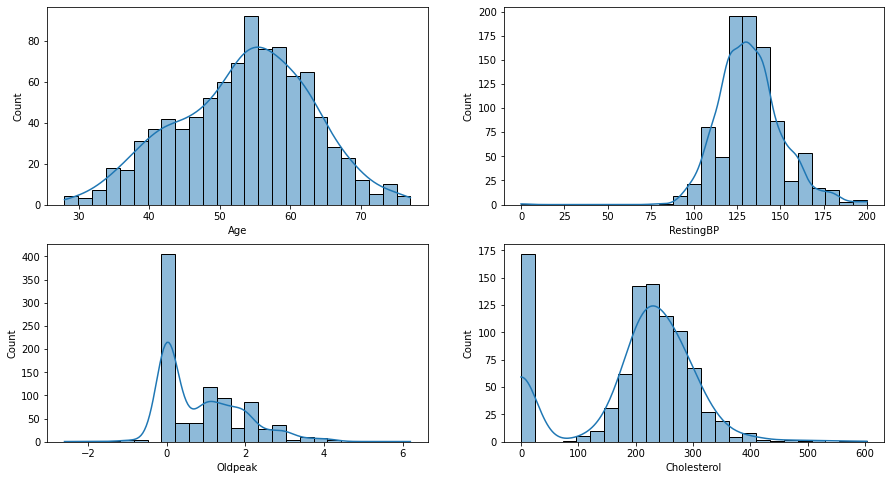

In [91]:
fig, axes = plt.subplots(2,2, figsize = (15,8))

sns.histplot(data = df, x = 'Age', kde= True, bins = 25, ax = axes[0,0])
sns.histplot(data = df, x = 'RestingBP', kde= True, bins = 25, ax = axes[0,1])
sns.histplot(data = df, x = 'Oldpeak', kde= True, bins = 25, ax = axes[1,0])
sns.histplot(data = df, x = 'Cholesterol', kde= True, bins = 25, ax = axes[1,1])

### We can observe that 

✔ 47-68 years is the most prone age to heart-diseases.

✔ Resting Blood Pressure consistently above or below 110mm-160mm can be a factor in determining a person's risk of a heart attack.

✔ Oldpeak is the cardiac stress test, an ST depression of at least 1 mm so it can't be negative.

✔ Cholesterol between 100-400mm/dl are causing the maximum number of heart diseases. 

✔ There are so many cases of 0 cholesterol. If Low Density Lipoprotein cholesterol levels are too low, it can also lead to increased risk of cardiovascular diseases. But it is impractical to have 0 cholesterol heart patients so later we will remove them.


## Different Countplots required to answer the following questions?

- Are heart problems more common in males or females?
- Can an ECG indicate heart disease? 
- Which type of chest pain is most common in heart disease cases?
- Does people with diabetes are also more likely to have risk for heart disease?
- What is the count of exercise angina patients?


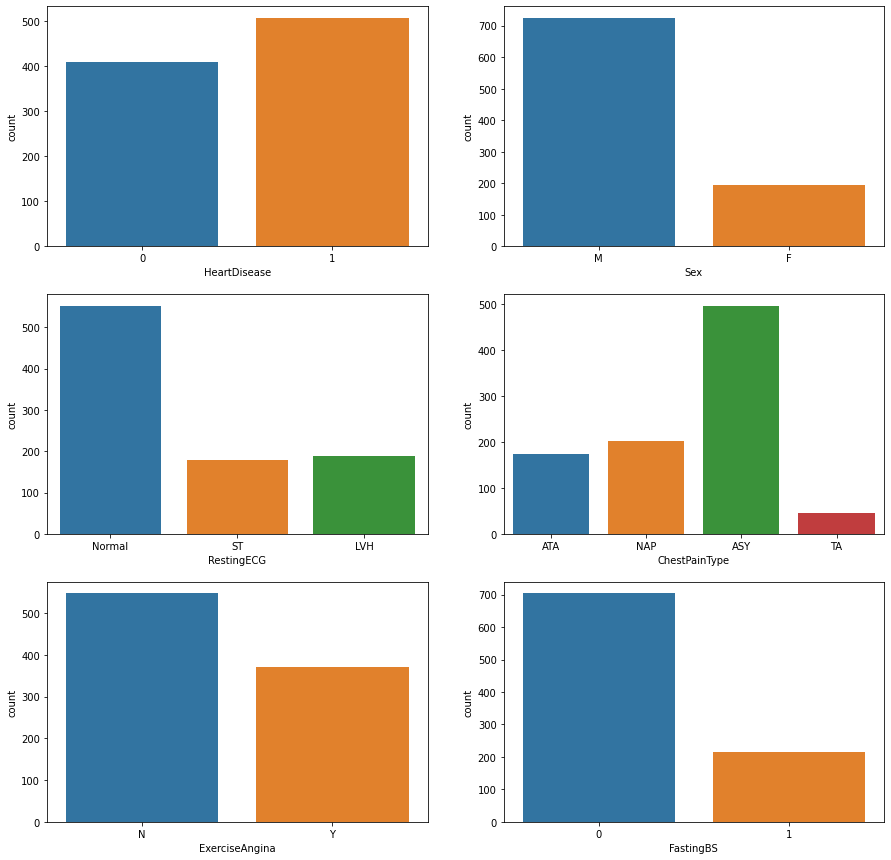

In [92]:
fig, axes = plt.subplots(3,2, figsize = (15,15))

sns.countplot(data = df, x = 'HeartDisease', ax = axes[0,0])
sns.countplot(data = df, x = 'Sex', ax = axes[0,1])
sns.countplot(data = df, x = 'RestingECG', ax = axes[1,0])
sns.countplot(data = df, x = 'ChestPainType', ax = axes[1,1])
sns.countplot(data = df, x = 'ExerciseAngina', ax = axes[2,0])
sns.countplot(data = df, x = 'FastingBS', ax = axes[2,1])


### Maximum Heart Rate Distribution

- What is the maximum heart rate achieved in a heart disease case?

Mean Heart Rate value is: 136.80936819172112


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Maximum heart rate Distribution')

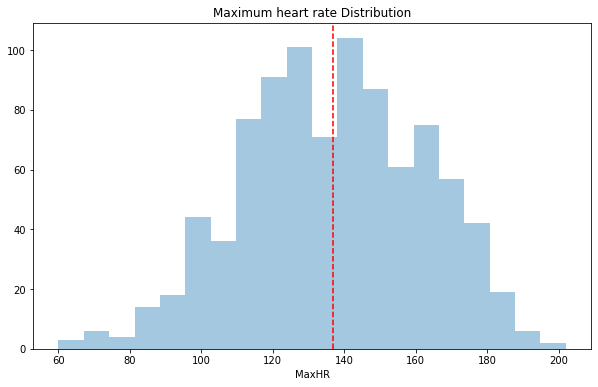

In [93]:
max_m = df['MaxHR'].describe()
print("Mean Heart Rate value is: {}".format(max_m['mean']))

plt.figure(figsize = (10, 6))
sns.distplot(df['MaxHR'],kde= False)
plt.axvline(max_m['mean'], linestyle = '--', color = "red")
plt.title('Maximum heart rate Distribution')

### Does male or female have higher risk of heart attacks in respect of their age?

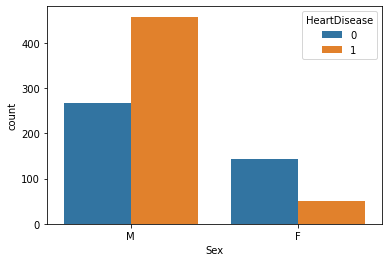

In [94]:
sns.countplot(x='Sex',hue='HeartDisease',data=df)

In [95]:
import plotly.express as px
fig = px.bar(data_frame= df, x = 'Age', y = 'HeartDisease', color = 'Sex')
fig.show()


### Is Exercise Angina(pain) a heart disease?

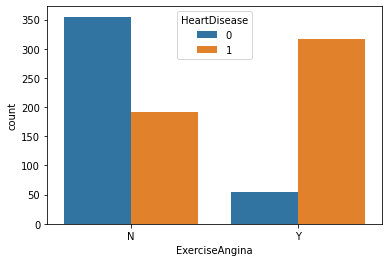

In [96]:
sns.countplot(x='ExerciseAngina',hue='HeartDisease',data=df)

### Trend of cholesterol varies with age w.r.t gender

In [97]:
import plotly.express as px
fig = px.box(data_frame= df, x = 'Age', y = 'Cholesterol', color = 'Sex', title = "Age vs Cholesterol")
fig.show()

### Correlation Matrix

Text(0.5, 1.0, 'Features Correlation Heatmap')

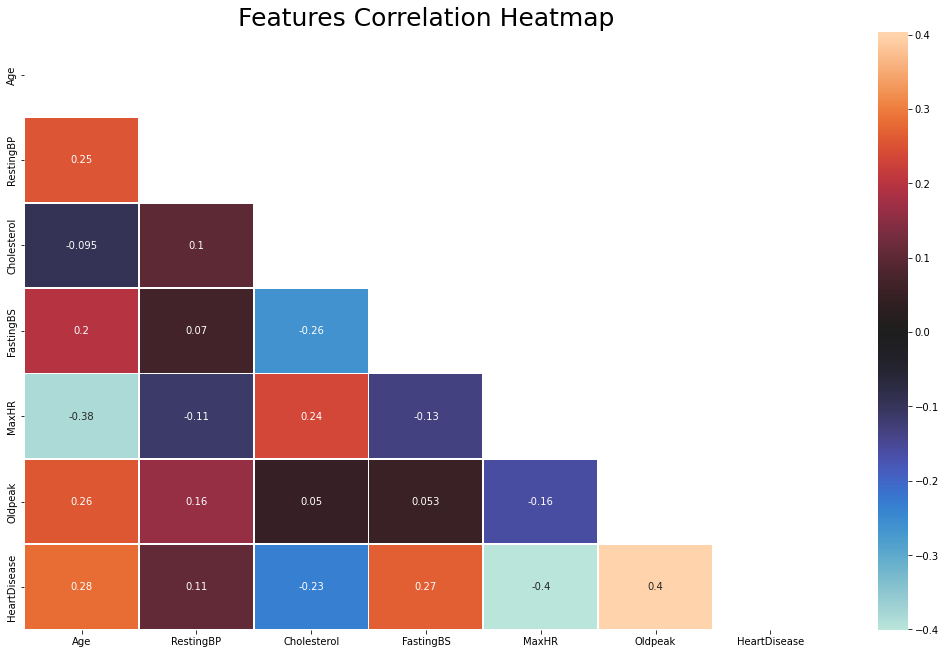

In [98]:
plt.figure(figsize=(18, 11))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),center= 0, annot=True, linewidth=0.8, mask=matrix)

plt.title('Features Correlation Heatmap', fontsize = 25)

# Data Preprocessing

### Dealing with some unappropiate values of Oldpeak and Cholesterol

We have seen earlier that Oldpeak histogram has some negative data so we need to deal with them cause oldpeak can not be negative.

In [99]:
df[df['Oldpeak']<0]

Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
321   63   M           ASY  ...     -0.9      Flat             1
324   46   M           ASY  ...     -2.6      Flat             1
325   42   M           ASY  ...     -1.5      Down             1
326   45   M           NAP  ...     -0.1        Up             0
331   56   M           ASY  ...     -1.0        Up             1
332   38   M           NAP  ...     -1.1        Up             0
334   51   M           ASY  ...     -0.7        Up             1
335   62   M            TA  ...     -0.8      Flat             1
352   56   M           ASY  ...     -1.0      Down             1
407   62   M           ASY  ...     -0.5      Flat             1
413   56   M           NAP  ...     -2.0      Flat             1
421   66   M           NAP  ...     -0.5        Up             0
512   35   M           NAP  ...     -0.1        Up             0

[13 rows x 12 columns]

In [100]:
df.loc[df['Oldpeak']<0,'Oldpeak'] = df[df['Oldpeak']<0]['Oldpeak']*(-1)

- So we have converted all the negative Oldpeak into positive Oldpeak.

We have also seen some 0 values in cholesterol histogram, so we are going to deal with them.

In [101]:
df["Cholesterol"]=df["Cholesterol"].replace(0,df["Cholesterol"].mean())

Next feature to be cleaned is RestingBP, because RestingBP has also some 0 value and BP can't be 0. So we fill replace the 0 value with it's median.

In [102]:
df["RestingBP"]=df["RestingBP"].replace(0,df["RestingBP"].mean())

- Now our data is cleaned.

### Categorical Variables(Dummy Variables)

In [103]:
df = pd.get_dummies(df, drop_first=True)

In [104]:
df.head()

Age  RestingBP  Cholesterol  ...  ExerciseAngina_Y  ST_Slope_Flat  ST_Slope_Up
0   40      140.0        289.0  ...                 0              0            1
1   49      160.0        180.0  ...                 0              1            0
2   37      130.0        283.0  ...                 0              0            1
3   48      138.0        214.0  ...                 1              1            0
4   54      150.0        195.0  ...                 0              0            1

[5 rows x 16 columns]

# Model Building

In [105]:
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [108]:
y_pred = classifier.predict(X_test)

In [109]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8369565217391305

In [110]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[101,  25],
       [ 20, 130]])

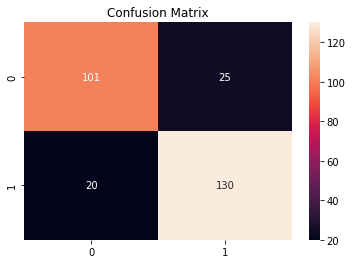

In [111]:
#ploting heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [112]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       126
           1       0.84      0.87      0.85       150

    accuracy                           0.84       276
   macro avg       0.84      0.83      0.84       276
weighted avg       0.84      0.84      0.84       276



## SVM

In [113]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [114]:
y_pred = classifier.predict(X_test)

In [115]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.6666666666666666

In [116]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[ 73,  53],
       [ 39, 111]])

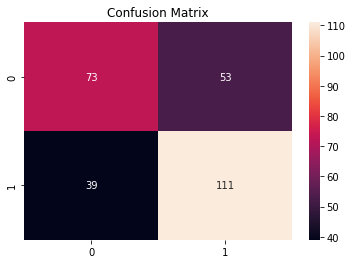

In [117]:
#ploting heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## Decision Tree

In [118]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [119]:
y_test_pred = classifier.predict(X_test)

In [120]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.7898550724637681

In [121]:
con_metric = metrics.confusion_matrix(y_test, y_test_pred)
con_metric

array([[ 89,  37],
       [ 21, 129]])

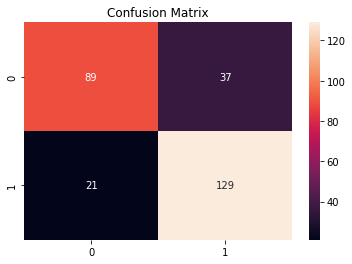

In [122]:
#ploting heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## Logistic Regression is giving highest accuracy of 83.6%.